In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading and inspection

In [334]:
# we start by loading the data set contained in the data folder
data = pd.read_csv('./data/heart_attack_prediction_dataset.csv')

In [335]:
# Data inspection
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [336]:
#data features
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

The feature "Patient ID" won't be useful in our study, so we'll start by removing it from our dataset.

In [337]:
data = data.drop(columns=["Patient ID"])

In [338]:
#Numerical and categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns
print(" Columns with numerical values are :", list(numerical_columns),"\n","Columns with categorical values are :", list(categorical_columns))

 Columns with numerical values are : ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk'] 
 Columns with categorical values are : ['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


We make sure that there are no missing values in our dataset

In [339]:
missing_values = data.isna().sum()
print(missing_values)

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


### Gender distribution

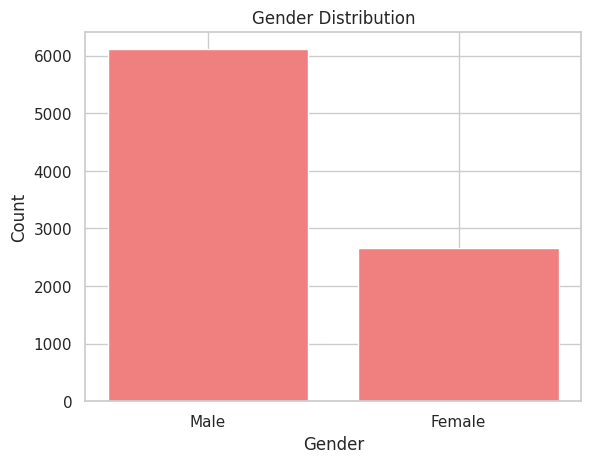

In [340]:
gender_counts = data['Sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


We can see that most of studied patients were male

### Age distribution by age and age group

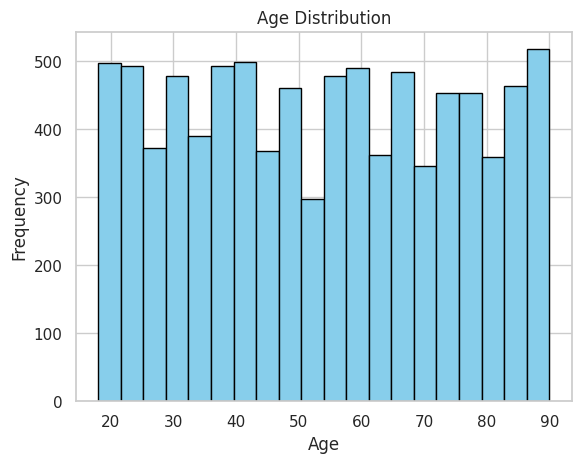

/tmp/ipykernel_8668/4142431706.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age_Group', palette="Set3")


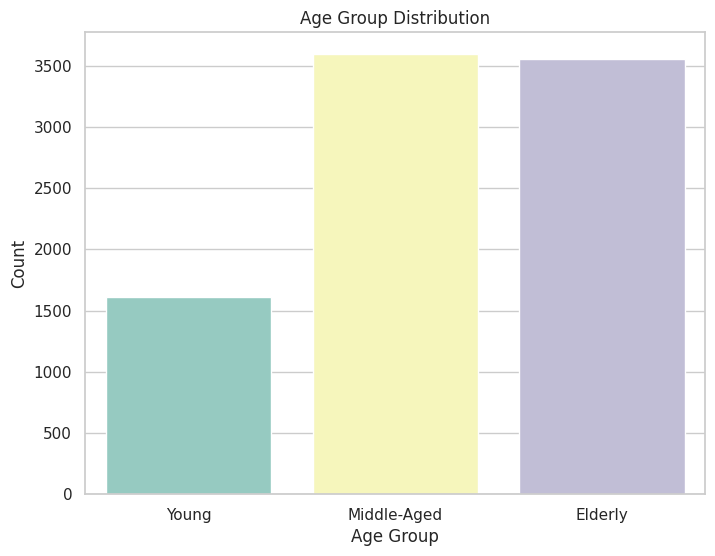

In [341]:

plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-Aged', 'Elderly'])
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age_Group', palette="Set3")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()


### Feature "Smoking"

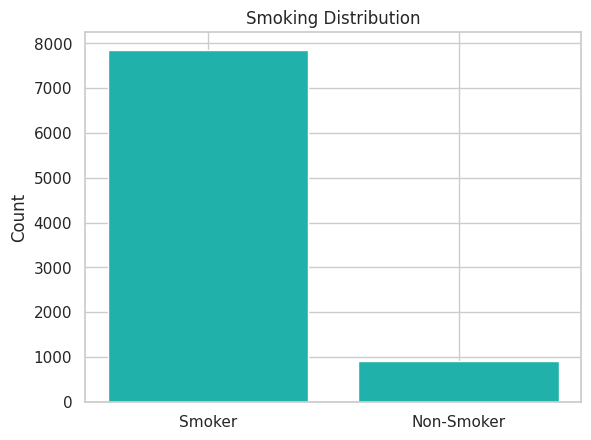

In [342]:
smoking_counts = data['Smoking'].value_counts()
plt.bar(["Smoker","Non-Smoker"], smoking_counts.values, color='lightseagreen')
plt.ylabel('Count')
plt.title('Smoking Distribution')
plt.show()

We can observe that there isn't an equal distribution between smokers and non-smokers in this dataset. The number of smokers is approximately eight times higher than the number of non-smokers. This should be considered when splitting the data.

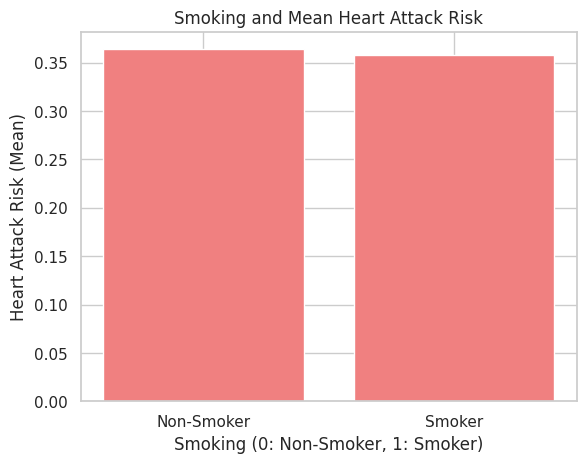

In [343]:
smoking_and_heart_attack = data.groupby('Smoking')['Heart Attack Risk'].mean()

plt.bar(smoking_and_heart_attack.index, smoking_and_heart_attack.values, color='lightcoral')
plt.xlabel('Smoking (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Heart Attack Risk (Mean)')
plt.title('Smoking and Mean Heart Attack Risk')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

### Feature Stress Level

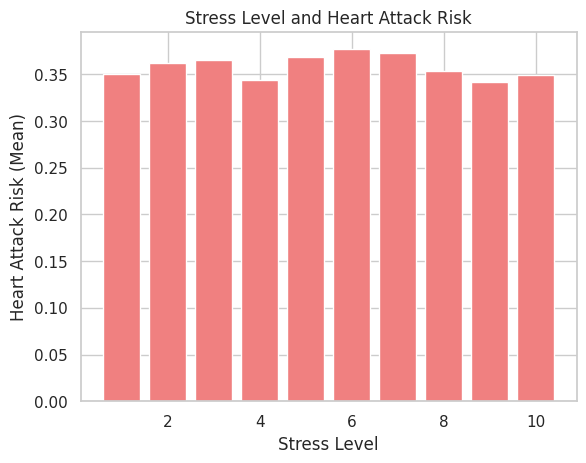

In [344]:
stress_and_heart_attack = data.groupby('Stress Level')['Heart Attack Risk'].mean()
plt.bar(stress_and_heart_attack.index, stress_and_heart_attack.values, color='lightcoral')
plt.xlabel('Stress Level')
plt.ylabel('Heart Attack Risk (Mean)')
plt.title('Stress Level and Heart Attack Risk')
plt.show()

### Feature BMI

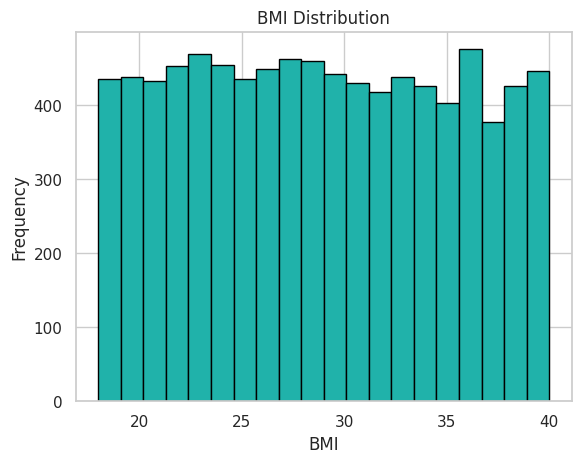

/tmp/ipykernel_8668/875231551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='BMI_Category', palette="Set3")


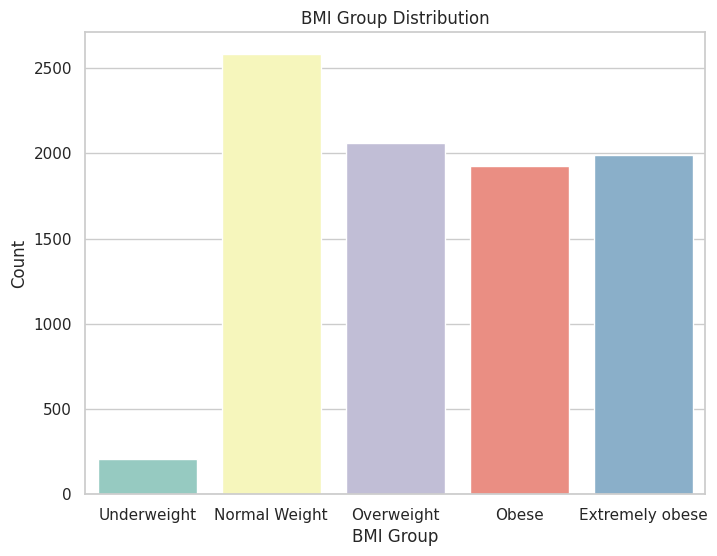

In [345]:

plt.hist(data['BMI'], bins=20, color='lightseagreen', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 100], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese', 'Extremely obese'])
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='BMI_Category', palette="Set3")
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.title('BMI Group Distribution')
plt.show()

### Feature Diabetes

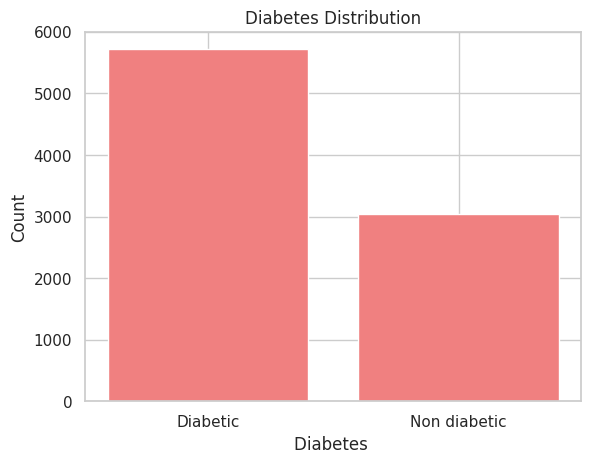

In [346]:
diabetes_counts = data['Diabetes'].value_counts()
plt.bar(["Diabetic", "Non diabetic"], diabetes_counts.values, color='lightcoral')
plt.xlabel('Diabetes ')
plt.ylabel('Count')
plt.title('Diabetes Distribution')
plt.show()

### Feature "Previous Heart Problems"

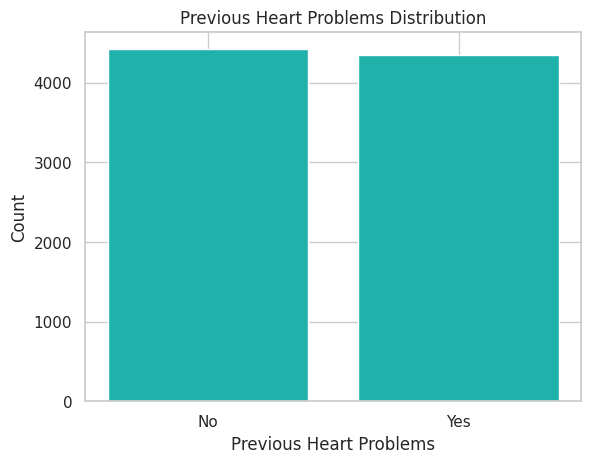

In [347]:
previous_heart_counts = data['Previous Heart Problems'].value_counts()
plt.bar(['No', "Yes"], previous_heart_counts.values, color='lightseagreen')
plt.xlabel('Previous Heart Problems')
plt.ylabel('Count')
plt.title('Previous Heart Problems Distribution')
plt.show()

### Feature "Alcohol Consumption"

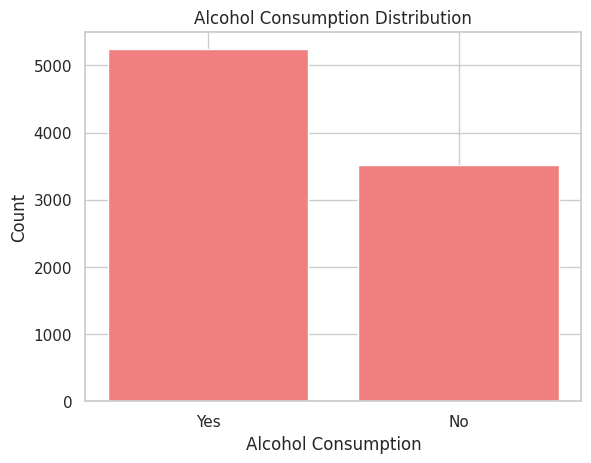

In [348]:
alcohol_counts = data['Alcohol Consumption'].value_counts()
plt.bar(["Yes", "No"], alcohol_counts.values, color='lightcoral')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.title('Alcohol Consumption Distribution')
plt.show()

### Feature "Cholesterol"

/tmp/ipykernel_8668/395937966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Cholesterol_Category', palette="Set3")


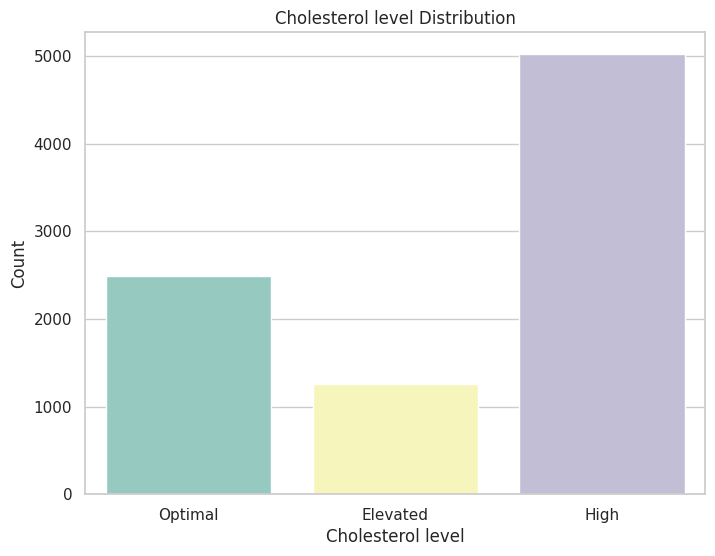

In [349]:
data['Cholesterol_Category'] = pd.cut(data['Cholesterol'], bins=[0, 200, 240,500], labels=['Optimal', 'Elevated', 'High'])
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Cholesterol_Category', palette="Set3")
plt.xlabel('Cholesterol level')
plt.ylabel('Count')
plt.title('Cholesterol level Distribution')
plt.show()


It seems that many of the studied patients suffer from high cholesterol

### Exercise and physical activity

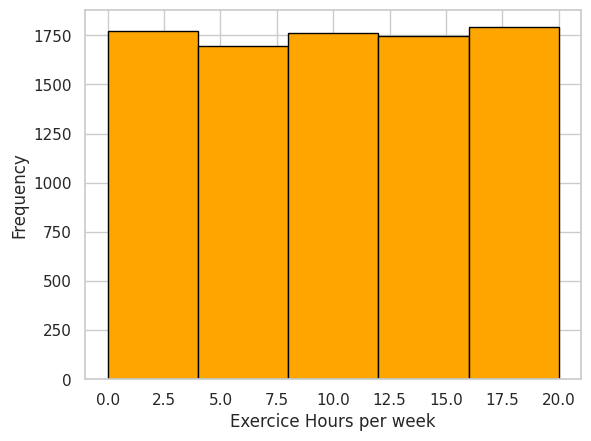

In [350]:
plt.hist(data["Exercise Hours Per Week"], bins=5,color='orange', edgecolor='black')
plt.xlabel('Exercice Hours per week')
plt.ylabel('Frequency')
plt.show()


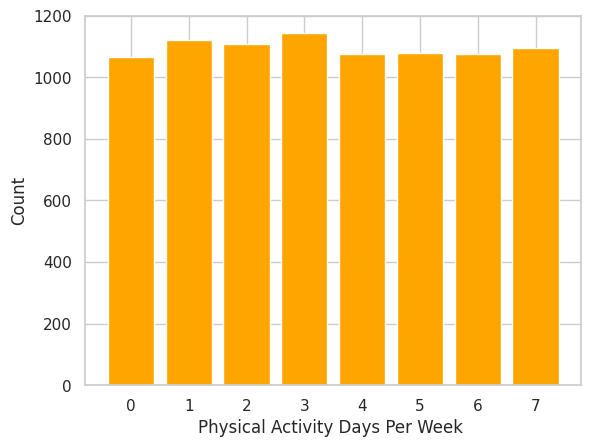

In [351]:
physical_counts = data["Physical Activity Days Per Week"].value_counts()
plt.bar(physical_counts.index, physical_counts.values, color='orange')
plt.xlabel('Physical Activity Days Per Week ')
plt.ylabel('Count')
plt.show()


### Sleep Hours Per Day

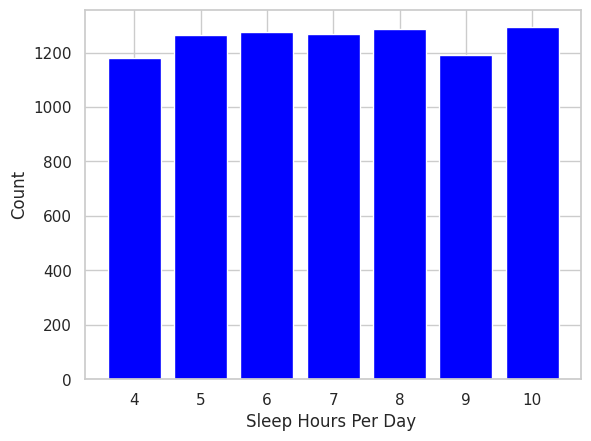

In [352]:
sleep_counts = data["Sleep Hours Per Day"].value_counts()
plt.bar(sleep_counts.index, sleep_counts.values, color='blue')
plt.xlabel('Sleep Hours Per Day ')
plt.ylabel('Count')
plt.show()


### feature "Heart Attack Risk"

This is actually our target feature that we will be trying to predict

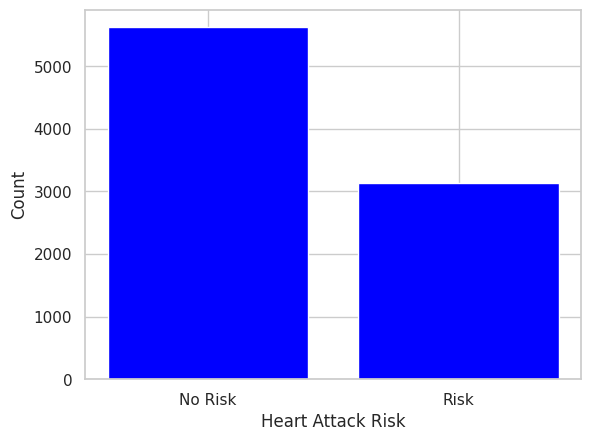

In [353]:
target_counts = data["Heart Attack Risk"].value_counts()
plt.bar(["No Risk", "Risk"], target_counts.values, color='blue')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.show()


### Correlation between numerical features

In [354]:
numeric_vals = data.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(['Heart Attack Risk'], inplace=True, ascending=False)

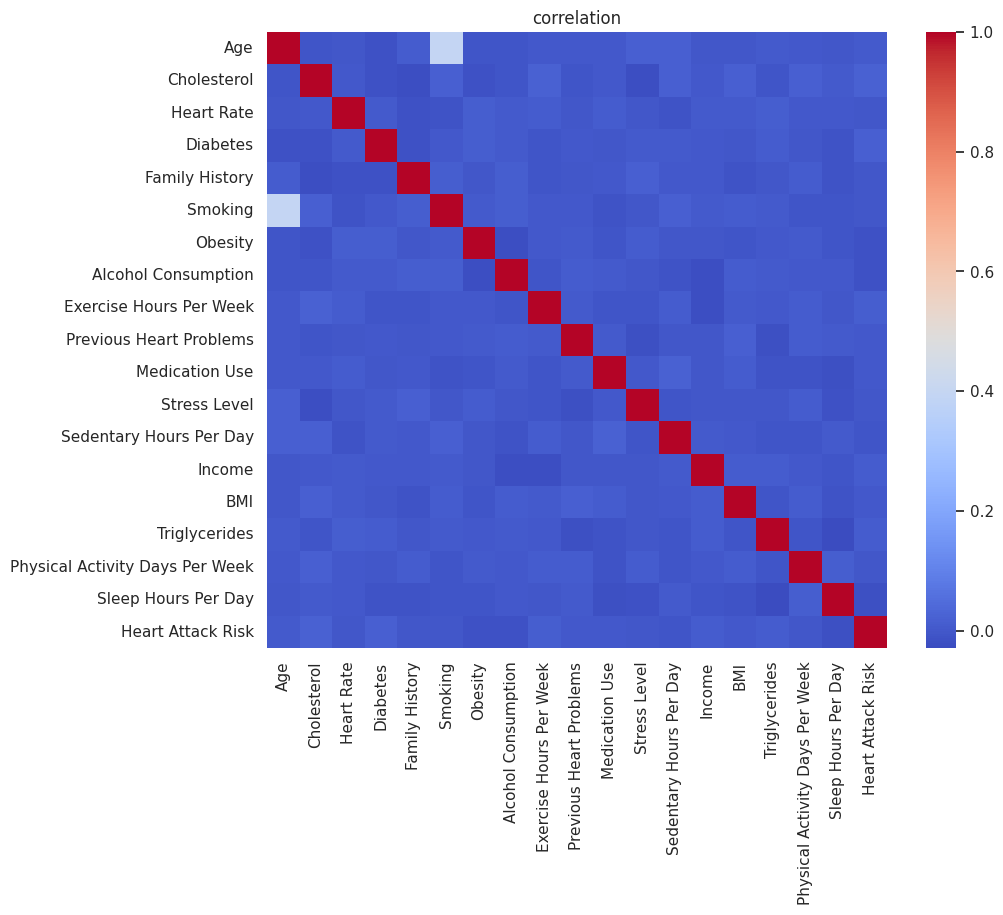

In [355]:


numeric_data = data.select_dtypes(include=["int64","float64"])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt = ".2f")
plt.title("correlation")
plt.show()



Thus there is no correlation between these different features